In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras

2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

Load the Data

In [ ]:
from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv("PT Dataset Changed.csv")
da=pd.read_csv("PT Dataset For Model Error Prediction.csv",sep=",")
dataset = pd_dat.values

In [ ]:
dataset

array([[ 3.30e+01,  5.00e+01,  2.00e-01,  3.00e+01,  2.00e+03,  9.00e+02,
         9.00e+02, -8.39e-02, -5.94e-02, -5.24e-02, -1.10e-01, -6.90e-01,
        -8.60e-01,  8.02e-02,  1.03e-01,  1.09e-01,  6.70e-01,  1.10e-01,
        -5.50e-01],
       [ 3.30e+01,  5.00e+01,  2.00e-01,  3.00e+01,  2.00e+03,  7.00e+02,
         8.00e+02, -2.56e-02, -1.20e-02, -7.00e-03, -1.00e-01, -4.30e-01,
        -5.30e-01,  1.31e-01,  1.43e-01,  1.47e-01,  5.20e-01,  2.00e-01,
         1.00e-01],
       [ 3.30e+01,  5.00e+01,  2.00e-01,  3.00e+01,  2.00e+03,  7.50e+02,
         7.50e+02, -4.50e-02, -5.95e-02, -6.61e-02, -1.60e-01,  5.30e-01,
         2.70e-01,  1.16e-01,  1.24e-01,  1.28e-01,  5.00e-01,  3.60e-01,
         2.90e-01],
       [ 3.30e+01,  5.00e+01,  2.00e-01,  3.00e+01,  2.00e+03,  9.50e+02,
         9.80e+02, -1.53e-01, -1.46e-01, -1.44e-01, -4.70e-01, -5.70e-01,
        -5.80e-01,  9.86e-02,  1.06e-01,  1.08e-01,  1.00e-02, -1.00e-01,
        -1.10e-01],
       [ 3.30e+01,  5.00e+01,  2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:7],dataset[:,7:], test_size=0.33)
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
# .astype(np.float32)

In [ ]:
spec_train, Burden_train, class_train, BDV_train, PtoS_train, PtoE_train, StoR_train = np.transpose(X_train)
spec_test, Burden_test, class_test, BDV_test, PtoS_test, PtoE_test, StoR_test = np.transpose(X_test)

Ratio100Error120_train, Ratio100Error100_train ,Ratio100Error80_train, Phase100Error120_train ,Phase100Error100_train, Phase100Error80_train, Ratio25Error120_train, Ratio25Error100_train, Ratio25Error80_train, Phase25Error120_train, Phase25Error100_train, Phase25Error80_train = Y_train[:,0], Y_train[:,1], Y_train[:,2], Y_train[:,3],Y_train[:,4],Y_train[:,5],Y_train[:,6],Y_train[:,7],Y_train[:,8],Y_train[:,9],Y_train[:,10], Y_train[:,11]
Ratio100Error120_test, Ratio100Error100_test ,Ratio100Error80_test, Phase100Error120_test ,Phase100Error100_test, Phase100Error80_test, Ratio25Error120_test, Ratio25Error100_test, Ratio25Error80_test, Phase25Error120_test, Phase25Error100_test, Phase25Error80_test = Y_test[:,0], Y_test[:,1], Y_test[:,2], Y_test[:,3],Y_test[:,4],Y_test[:,5],Y_test[:,6],Y_test[:,7],Y_test[:,8],Y_test[:,9],Y_test[:,10], Y_test[:,11]

Build the Model

In [ ]:
from tensorflow.keras import Input, layers
shape_inputs = (1,)
spec = Input(shape=shape_inputs, name='spec')
Burden= Input(shape=shape_inputs, name='Burden')
Class= Input(shape=shape_inputs, name='Class')
BDVOil= Input(shape=shape_inputs, name='BDVOil')
PtoS= Input(shape=shape_inputs, name='PtoS')
PtoE= Input(shape=shape_inputs, name='PtoE')
StoR= Input(shape=shape_inputs, name='StoR')


In [ ]:
list_inputs = [spec,  Burden, Class,  BDVOil, PtoS, PtoE, StoR]

In [ ]:
X= layers.concatenate(list_inputs)

In [ ]:
Ratio100Error120 = layers.Dense(1,activation='sigmoid', name= 'R100E120')(X)
Ratio100Error100 = layers.Dense(1,activation='sigmoid', name= 'R100E100')(X) 
Ratio100Error80 = layers.Dense(1,activation='sigmoid', name= 'R100E80')(X)
Phase100Error120 = layers.Dense(1,activation='sigmoid', name= 'P100E120')(X) 
Phase100Error100 = layers.Dense(1,activation='sigmoid', name= 'P100E100')(X)
Phase100Error80 = layers.Dense(1,activation='sigmoid', name= 'P100E80')(X)
Ratio25Error120 = layers.Dense(1,activation='sigmoid', name= 'R25E120')(X)
Ratio25Error100 = layers.Dense(1,activation='sigmoid', name= 'R25E100')(X)
Ratio25Error80 = layers.Dense(1,activation='sigmoid', name= 'R25E80')(X)
Phase25Error120 = layers.Dense(1,activation='sigmoid', name= 'P25E120')(X)
Phase25Error100 = layers.Dense(1,activation='sigmoid', name= 'P25E100')(X)
Phase25Error80 = layers.Dense(1,activation='sigmoid', name= 'P25E80')(X)

In [ ]:
list_outputs = [Ratio100Error120, Ratio100Error100, Ratio100Error80, Phase100Error120, Phase100Error100, Phase100Error80, Ratio25Error120, Ratio25Error100, Ratio25Error80, Phase25Error120, Phase25Error100, Phase25Error80]   
reg1 = linear_model.LinearRegression()
reg1.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error120)
reg2 = linear_model.LinearRegression()
reg2.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error100)
reg3 = linear_model.LinearRegression()
reg3.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Ratio100Error80)
reg4 = linear_model.LinearRegression()
reg4.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error120)
reg5 = linear_model.LinearRegression()
reg5.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error100)
reg6 = linear_model.LinearRegression()
reg6.fit(da.drop(['Ratio100Error120','Ratio100Error100','Ratio100Error80','Phase100Error120','Phase100Error100','Phase100Error80','VoltageFactor'],axis='columns'),da.Phase100Error80)
reg1.coef_
reg2.coef_
reg3.coef_
reg4.coef_
reg5.coef_
reg6.coef_
reg1.intercept_
reg2.intercept_
reg3.intercept_
reg4.intercept_
reg5.intercept_
reg6.intercept_

1.6534917372211582

In [ ]:
model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

Plot the Model

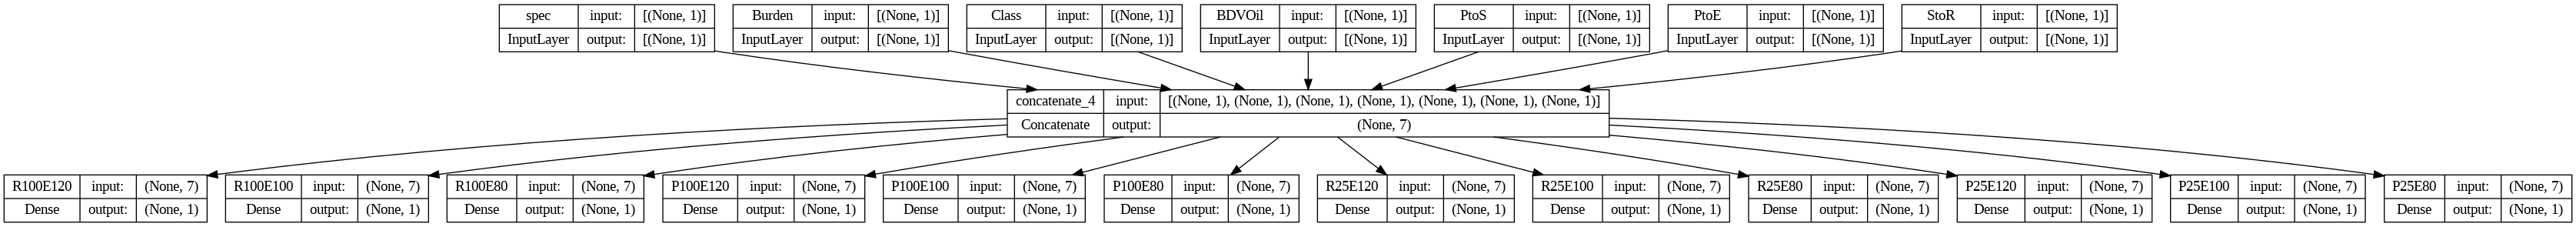

In [ ]:
tf.keras.utils.plot_model(model, 'muti_input_output_model.png', show_shapes=True)

Compile The Model

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss={'Ratio100Error120':'binary_crossentropy', 
#                                                                 'Ratio100Error100':'binary_crossentropy',
#                                                                 'Ratio100Error80':'binary_crossentropy', 
#                                                                 'Phase100Error120':'binary_crossentropy', 
#                                                                 'Phase100Error100':'binary_crossentropy', 
#                                                                 'Phase100Error80':'binary_crossentropy',
#                                                                 'Ratio25Error120':'binary_crossentropy', 
#                                                                 'Ratio25Error100':'binary_crossentropy',
#                                                                 'Ratio25Error80':'binary_crossentropy',
#                                                                 'Phase25Error120':'binary_crossentropy',
#                                                                 'Phase25Error100':'binary_crossentropy', 
#                                                                 'Phase25Error80':'binary_crossentropy'},
#                                                                 metrics=['acc'],
#                                                                 loss_weights=[1.,0.2])

In [ ]:
from keras.backend import binary_crossentropy
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss=
                                                                ['binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                'binary_crossentropy',
                                                                'binary_crossentropy',
                                                                'binary_crossentropy',
                                                                'binary_crossentropy', 
                                                                 'binary_crossentropy'
                                                                 ]
                                                                ,
                                                                metrics={'R100E120':['acc'],
                                                                         'R100E100':['acc'],
                                                                         'R100E80':['acc'],
                                                                         'P100E120':['acc'],
                                                                         'P100E100':['acc'],
                                                                         'P100E80':['acc'],
                                                                         'R25E120':['acc'],
                                                                         'R25E100':['acc'],
                                                                         'R25E80':['acc'],
                                                                         'P25E120':['acc'],
                                                                         'P25E100':['acc'],
                                                                         'P25E80':['acc']
                                                                         },
                                                                loss_weights=[1.,0.2])


In [1]:
model.compile(
    loss = {
        "output_2" : keras.losses.BinaryCrossentropy(from_logits=False),
        "output_1" : keras.losses.CategoricalCrossentropy(from_logits=False)
    },
    metrics = ['Accuracy'],
    optimizer = keras.optimizers.Adam()
)

Accuracy: 0.7


Fit Model

In [ ]:
# inputs_train={'spec' :spec_train, 
#               'PTRatio': PTRatio_train, 
#               'Type1':Type1_train, 
#               'Type2':Type2_train, 
#               'Burden':Burden_train, 
#               'Class': class_train, 
#               'VoltF':VF_train, 
#               'BDVOil': BDV_train, 
#               'PtoS':PtoS_train, 
#               'PtoE': PtoE_train, 
#               'StoR':StoR_train}

# outputs_train={'Ratio100Error120': Ratio100Error120_train,
#                 'Ratio100Error100':Ratio100Error100_train,
#                 'Ratio100Error80':Ratio100Error80_train ,
#                 'Phase100Error120':Phase100Error120_train,
#                 'Phase100Error100':Phase100Error100_train,
#                 'Phase100Error80':Phase100Error80_train,
#                 'Ratio25Error120':Ratio25Error120_train,
#                 'Ratio25Error100':Ratio25Error100_train,
#                 'Ratio25Error80':Ratio25Error80_train,
#                 'Phase25Error120':Phase25Error120_train,
#                 'Phase25Error100':Phase25Error100_train,
#                 'Phase25Error80':Phase25Error80_train

# }

In [ ]:
inputs_train=[spec_train, 
              Burden_train, 
              class_train, 
               BDV_train, 
              PtoS_train, 
               PtoE_train, 
              StoR_train]

outputs_train=[Ratio100Error120_train,
                Ratio100Error100_train,
                Ratio100Error80_train 
                ,Phase100Error120_train,
                Phase100Error100_train,
                Phase100Error80_train,
                Ratio25Error120_train,
                Ratio25Error100_train,
                Ratio25Error80_train,
                Phase25Error120_train,
                Phase25Error100_train,
                Phase25Error80_train
]

In [ ]:
history = model.fit(inputs_train, outputs_train,
                    epochs = 6,
                    batch_size=32,
                    #128
                    verbose=False)

In [ ]:
reg1.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06848368])

In [ ]:
reg2.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06125002])

In [ ]:
reg3.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.05693145])

In [ ]:
reg4.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.06251013])

In [ ]:
reg5.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.24514275])

In [ ]:
reg6.predict([[33,50,0.2,44,1000,50,750]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.39755326])